In [154]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction import DictVectorizer

#  Data preparation

In [1]:
DATA_DIR = 'd:/maschineLearning/zoomcamp/mlzoomcamp-2022-01-pensive-ride/data'
MODEL_DIR = 'd:/maschineLearning/zoomcamp/mlzoomcamp-2022-01-pensive-ride/models'
SEED = 42 # used to fix random_state

In [299]:
df_train = pd.read_csv(DATA_DIR + '/processed/train.csv', index_col=0)
df_val = pd.read_csv(DATA_DIR + '/processed/val.csv', index_col=0)
df_test = pd.read_csv(DATA_DIR + '/processed/test.csv', index_col=0)

In [300]:
data_train = df_train.copy()
data_val = df_val.copy()
data_test = df_test.copy()

In [18]:
data_test

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
521,female,group_C,bachelor's_degree,standard,completed,76.666667
737,male,group_D,associate's_degree,standard,none,82.000000
740,male,group_B,some_college,standard,none,52.000000
660,female,group_C,high_school,standard,completed,92.000000
411,female,group_B,bachelor's_degree,free_reduced,none,69.666667
...,...,...,...,...,...,...
408,male,group_A,high_school,standard,none,48.000000
332,male,group_C,some_college,standard,none,51.000000
208,female,group_A,some_college,standard,none,82.333333
613,male,group_C,high_school,free_reduced,completed,81.000000


In [301]:
data_train.reset_index(drop=True)
data_val.reset_index(drop=True)
data_test.reset_index(drop=True)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
0,female,group_C,bachelor's_degree,standard,completed,76.666667
1,male,group_D,associate's_degree,standard,none,82.000000
2,male,group_B,some_college,standard,none,52.000000
3,female,group_C,high_school,standard,completed,92.000000
4,female,group_B,bachelor's_degree,free_reduced,none,69.666667
...,...,...,...,...,...,...
195,male,group_A,high_school,standard,none,48.000000
196,male,group_C,some_college,standard,none,51.000000
197,female,group_A,some_college,standard,none,82.333333
198,male,group_C,high_school,free_reduced,completed,81.000000


In [302]:
y_train = data_train['average_score'].values
y_val = data_val['average_score'].values
y_test = data_test['average_score'].values

In [303]:
del data_train['average_score']
del data_val['average_score']
del data_test['average_score']

In [25]:
data_test

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
521,female,group_C,bachelor's_degree,standard,completed
737,male,group_D,associate's_degree,standard,none
740,male,group_B,some_college,standard,none
660,female,group_C,high_school,standard,completed
411,female,group_B,bachelor's_degree,free_reduced,none
...,...,...,...,...,...
408,male,group_A,high_school,standard,none
332,male,group_C,some_college,standard,none
208,female,group_A,some_college,standard,none
613,male,group_C,high_school,free_reduced,completed


In [27]:
dv = DictVectorizer(sparse=False)

train_dict = data_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = data_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = data_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [104]:
features = dv.get_feature_names_out()
features

array(['gender=female', 'gender=male', 'lunch=free_reduced',
       'lunch=standard', "parental_level_of_education=associate's_degree",
       "parental_level_of_education=bachelor's_degree",
       'parental_level_of_education=high_school',
       "parental_level_of_education=master's_degree",
       'parental_level_of_education=some_college',
       'parental_level_of_education=some_high_school',
       'race_ethnicity=group_A', 'race_ethnicity=group_B',
       'race_ethnicity=group_C', 'race_ethnicity=group_D',
       'race_ethnicity=group_E', 'test_preparation_course=completed',
       'test_preparation_course=none'], dtype=object)

In [170]:
len(features)

17

In [30]:
X_test[0]

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])

# Liner regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [34]:
Y_train = np.log1p(y_train)
Y_val = np.log1p(y_val)
Y_test = np.log1p(y_test)

In [36]:
model_line_regr = Ridge(alpha=0, solver="sag", random_state=SEED)

In [37]:
model_line_regr.fit(X_train, Y_train)

Ridge(alpha=0, random_state=42, solver='sag')

In [39]:
y_pred_lr = model_line_regr.predict(X_val)

In [281]:
rmse = np.sqrt(mean_squared_error(Y_val, y_pred_lr))
rmse.round(3)

0.193

In [49]:
alpha = [0, 0.01, 0.1, 1, 10]
solver= {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'}

In [85]:
solver_list = []
alpha_list = []
rmse_list = []
for sol in solver:
    for a in alpha:
        model = Ridge(alpha=a, solver=sol, random_state=SEED)
        model.fit(X_train, Y_train)
        y_pred_lr = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(Y_val, y_pred_lr))
        solver_list.append(sol)
        alpha_list.append(a)
        rmse_list.append(rmse)
        print(f'solver = {sol}, alpha = {a}, rmse = {rmse.round(7)}')

solver = cholesky, alpha = 0, rmse = 0.1949713
solver = cholesky, alpha = 0.01, rmse = 0.1931404
solver = cholesky, alpha = 0.1, rmse = 0.1931391
solver = cholesky, alpha = 1, rmse = 0.1931286
solver = cholesky, alpha = 10, rmse = 0.193207
solver = svd, alpha = 0, rmse = 0.1949713
solver = svd, alpha = 0.01, rmse = 0.1931404
solver = svd, alpha = 0.1, rmse = 0.1931391
solver = svd, alpha = 1, rmse = 0.1931286
solver = svd, alpha = 10, rmse = 0.193207
solver = saga, alpha = 0, rmse = 0.1931377
solver = saga, alpha = 0.01, rmse = 0.1931376
solver = saga, alpha = 0.1, rmse = 0.1931366
solver = saga, alpha = 1, rmse = 0.193128
solver = saga, alpha = 10, rmse = 0.1932098
solver = lsqr, alpha = 0, rmse = 0.193131
solver = lsqr, alpha = 0.01, rmse = 0.1931309
solver = lsqr, alpha = 0.1, rmse = 0.1931297
solver = lsqr, alpha = 1, rmse = 0.19312
solver = lsqr, alpha = 10, rmse = 0.1931905
solver = sag, alpha = 0, rmse = 0.1931605
solver = sag, alpha = 0.01, rmse = 0.1931592
solver = sag, alpha 

In [87]:
df_tuning_param = pd.DataFrame()
df_tuning_param['solver'] = solver_list
df_tuning_param['alpha'] = alpha_list
df_tuning_param['rmse'] = rmse_list
df_tuning_param = df_tuning_param.sort_values(by='rmse', ascending=True)
df_tuning_param = df_tuning_param.reset_index(drop=True)
df_tuning_param

,solver,alpha,rmse
0,sparse_cg,1.00,0.193115
1,lsqr,1.00,0.193120
2,sag,1.00,0.193122
3,sparse_cg,0.10,0.193124
4,sparse_cg,0.01,0.193126
5,sparse_cg,0.00,0.193126
6,saga,1.00,0.193128
7,svd,1.00,0.193129
8,cholesky,1.00,0.193129
9,auto,1.00,0.193129


In [88]:
model_line_regr = Ridge(alpha=df_tuning_param['alpha'][0], solver=df_tuning_param['solver'][0], random_state=SEED)
model_line_regr.fit(X_train, Y_train)

Ridge(random_state=42, solver='sparse_cg')

# Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor(n_estimators=10, random_state=SEED, n_jobs=-10)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-10, random_state=42)

In [91]:
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse 

13.986213658048431

In [121]:
scores = []

for depth in [10, 15, 20, 25]:
    for s in [1, 3, 5, 10, 50]:
        for n in range(10, 201, 10):
            rf = RandomForestRegressor(n_estimators=n, random_state = SEED, min_samples_leaf=s, max_depth=depth)
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_val)
            rmse = np.sqrt(mean_squared_error(y_pred, y_val))

            scores.append((n, depth, s, rmse))

In [122]:
columns = ['n_estimators','max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores = df_scores.sort_values(by='rmse', ascending=True).reset_index(drop=True)
df_scores

,n_estimators,max_depth,min_samples_leaf,rmse
0,190,15,10,12.231008
1,190,20,10,12.231008
2,190,10,10,12.231008
3,190,25,10,12.231008
4,200,10,10,12.231988
...,...,...,...,...
395,20,20,1,13.783243
396,10,10,1,13.803769
397,10,20,1,13.986214
398,10,25,1,13.986214


In [123]:
rf = RandomForestRegressor(n_estimators=df_scores['n_estimators'][0], random_state = SEED, min_samples_leaf=df_scores['min_samples_leaf'][0], max_depth=df_scores['max_depth'][0])
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=190,
                      random_state=42)

# Xgboost

Tuning the following parameters:

eta

max_depth

min_child_weight

In [107]:
import xgboost as xgb

In [108]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [109]:
wachlist = [(dtrain, 'train'), (dval, 'val')]

In [110]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

## Tuning eta

In [206]:
scores = {}

In [218]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=wachlist)

In [219]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

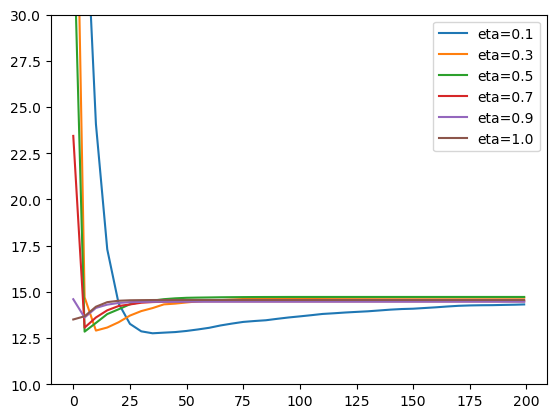

In [221]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.ylim(10, 30)
plt.legend()

eta = 0.1

## Tuning max_depth

In [222]:
scores = {}

In [235]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 17,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=wachlist)

In [236]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=17'

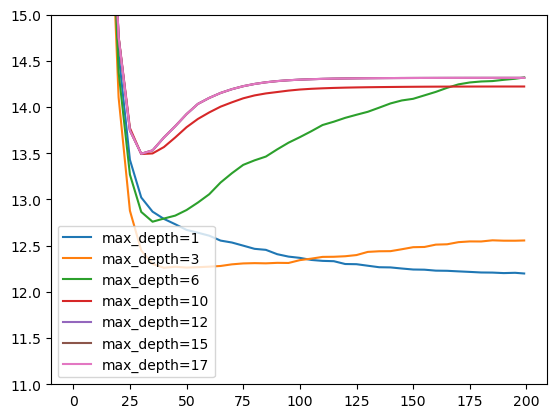

In [237]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

plt.ylim(11, 15)
plt.legend()

max_depth = 3

## Tuning min_child_weight

In [259]:
scores = {}

In [272]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 15,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=5, evals=wachlist)

In [273]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=15'

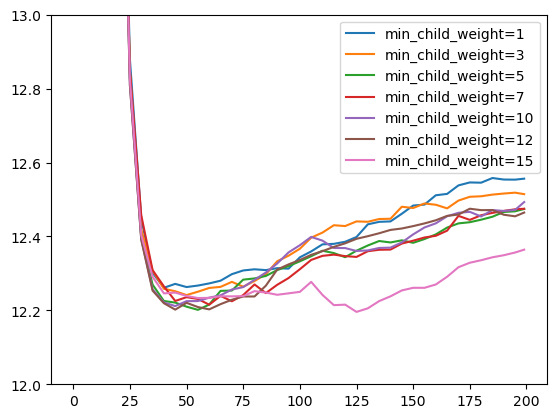

In [275]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.ylim(12, 13)
plt.legend()

min_child_weight = 15

In [277]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 15,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=75)
model

# Selecting the final model

## Linear regression

In [279]:
model_line_regr = Ridge(alpha=df_tuning_param['alpha'][0], solver=df_tuning_param['solver'][0], random_state=SEED)
model_line_regr.fit(X_train, Y_train)

Ridge(random_state=42, solver='sparse_cg')

In [284]:
y_pred_lr_log = model_line_regr.predict(X_val)

In [285]:
y_pred_lr = np.expm1(y_pred_lr_log)

In [287]:
rmse_lr = np.sqrt(mean_squared_error(y_pred_lr, y_val))
rmse_lr

12.129014917746668

## Random Forest

In [288]:
rf = RandomForestRegressor(n_estimators=df_scores['n_estimators'][0], 
                           random_state = SEED, min_samples_leaf=df_scores['min_samples_leaf'][0], 
                           max_depth=df_scores['max_depth'][0])

In [290]:
rf.fit(X_val, y_val)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=190,
                      random_state=42)

In [297]:
y_pred_rf =  rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred_rf, y_val))
rmse 

11.93002686364875

## Xgboosts

In [292]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 15,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=75)

In [295]:
y_pred_xgb = model_xgb.predict(dval)

In [298]:
y_pred_xgb
rmse = np.sqrt(mean_squared_error(y_pred_xgb, y_val))
rmse 

12.238637651873999

## The best model

the best model is Random Forest

In [306]:
df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True)

In [307]:
df_full_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
0,female,group_B,high_school,standard,none,54.666667
1,male,group_B,associate's_degree,free_reduced,completed,78.000000
2,female,group_D,high_school,standard,completed,87.333333
3,male,group_D,some_college,standard,completed,72.000000
4,female,group_C,some_high_school,standard,none,48.666667
...,...,...,...,...,...,...
795,female,group_D,high_school,standard,completed,64.000000
796,male,group_A,some_high_school,free_reduced,completed,40.000000
797,female,group_B,high_school,free_reduced,none,55.000000
798,female,group_D,bachelor's_degree,standard,completed,84.666667


In [308]:
y_full_train = df_full_train['average_score'].values

In [315]:
len(y_full_train)

800

In [309]:
del df_full_train['average_score']

In [310]:
df_full_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group_B,high_school,standard,none
1,male,group_B,associate's_degree,free_reduced,completed
2,female,group_D,high_school,standard,completed
3,male,group_D,some_college,standard,completed
4,female,group_C,some_high_school,standard,none
...,...,...,...,...,...
795,female,group_D,high_school,standard,completed
796,male,group_A,some_high_school,free_reduced,completed
797,female,group_B,high_school,free_reduced,none
798,female,group_D,bachelor's_degree,standard,completed


In [316]:
df_full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(df_full_train_dict)

In [317]:
rf = RandomForestRegressor(n_estimators=df_scores['n_estimators'][0], 
                           random_state = SEED, min_samples_leaf=df_scores['min_samples_leaf'][0], 
                           max_depth=df_scores['max_depth'][0])

In [318]:
rf.fit(X_full_train, y_full_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=10, n_estimators=190,
                      random_state=42)

In [319]:
y_pred_rf =  rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred_rf, y_test))
rmse 

12.632325479613622